In [1]:
from lxml import etree
from nltk.tree import ParentedTree
from rstviewer import embed_rs3_image, embed_rs3str_image
import discoursegraphs as dg
from discoursegraphs.readwrite.rst.rs3 import extract_relationtypes

In [2]:
def t(root, children=None):
    "Create nltk.tree.ParentedTree from a root (str) and a list of (str, list) tuples."
    assert isinstance(root, basestring)

    # Beware: a ParentedTree is also a list!
    if isinstance(children, ParentedTree):
        child_trees = [children]

    elif isinstance(children, list):
        child_trees = []
        for child in children:
            if isinstance(child, ParentedTree):
                child_trees.append(child)
            else:  #isinstance(child, tuple)
                child_trees.append(t(*child))
    elif isinstance(children, basestring):
        # this tree does only have one child, a leaf node
        child_trees = [children]
    else:  #children == None
        # this tree only consists of one leaf node
        child_trees = []
    return ParentedTree(root, child_trees)

In [3]:
# !ls *.rs3

In [4]:
# embed_rs3_image("foo-bar-only-segments.rs3")

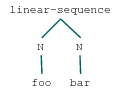

In [5]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [
    ("N", "foo"),
    ("N", "bar")])

In [6]:
# embed_rs3_image("foo-bar-circ-foo-to-bar.rs3")

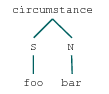

In [7]:
t("circumstance", [
    ("S", "foo"),
    ("N", "bar")])

In [8]:
# embed_rs3_image("foo-bar-elab-foo-to-bar.rs3")

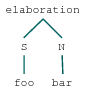

In [9]:
t("elaboration", [
    ("S", "foo"),
    ("N", "bar")])

In [10]:
# embed_rs3_image("foo-bar-circ-bar-to-foo.rs3")

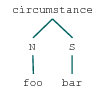

In [11]:
t("circumstance", [
    ("N", "foo"),
    ("S", "bar")])

In [12]:
# embed_rs3_image("foo-bar-elab-bar-to-foo.rs3")

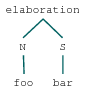

In [13]:
t("elaboration", [
    ("N", "foo"),
    ("S", "bar")])

In [14]:
# embed_rs3_image("foo-bar-foo-conj-bar.rs3")

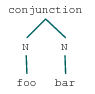

In [15]:
t("conjunction", [
    ("N", "foo"),
    ("N", "bar")])

In [16]:
# embed_rs3_image("foo-bar-foo-joint-bar.rs3")

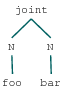

In [17]:
t("joint", [
    ("N", "foo"),
    ("N", "bar")])

In [18]:
# trees_with_three_elems = !ls eins*.rs3
# for rs3_file in trees_with_three_elems:
#     print "embed_rs3_image('{}')".format(rs3_file)

In [19]:
# embed_rs3_image('eins-zwei-drei-only-segments.rs3')

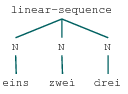

In [20]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

In [21]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-to-drei).rs3')

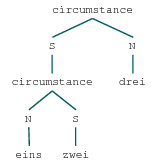

In [22]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("N", "drei")])

In [23]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3')

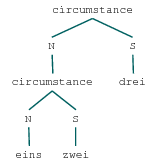

In [24]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("S", "drei")])

In [25]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3')

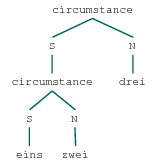

In [26]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("N", "drei")])

In [27]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3')

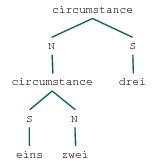

In [28]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("S", "drei")])

In [29]:
# embed_rs3_image('eins-zwei-drei-(circ-eins-to-(joint-zwei-and-drei).rs3')

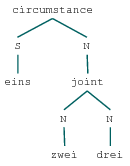

In [30]:
t("circumstance", [
    ("S", "eins"),
    ("N", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

In [31]:
# embed_rs3_image('eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3')

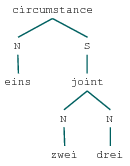

In [32]:
t("circumstance", [
    ("N", "eins"),
    ("S", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

In [33]:
# embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3')

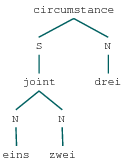

In [34]:
t("circumstance", [
    ("S", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("N", "drei")
])

In [35]:
# embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-from-drei).rs3')

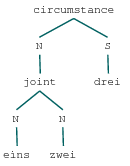

In [36]:
t("circumstance", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [37]:
# embed_rs3_image('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')

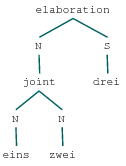

In [38]:
t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [39]:
# embed_rs3_image('eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3')

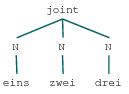

In [40]:
t("joint", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

In [41]:
example_tree = t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [42]:
example_tree.leaves()

['eins', 'zwei', 'drei']

In [43]:
example_tree.pretty_print()

           elaboration     
        ________|_______    
       N                |  
       |                |   
     joint              |  
  _____|________        |   
 N              N       S  
 |              |       |   
eins           zwei    drei



# TODO: does dg.readwrite.tree work with RSTGraph?

In [44]:
example_rs3 = 'eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3'

In [45]:
# embed_rs3_image(example_rs3)

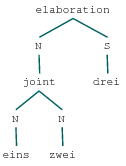

In [46]:
t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [47]:
rdg = dg.read_rs3(example_rs3)

In [48]:
# %load_ext gvmagic

In [49]:
# %dotstr dg.print_dot(rdg)

# TODO: why is root node not connected?

because the root node is a `<segment>` and not a `<group>`.

```xml
<body>
    <segment id="1">eins</segment>
    <segment id="2" parent="4" relname="joint"> zwei</segment>
    <segment id="3" parent="4" relname="joint"> drei</segment>
    <group id="4" type="multinuc" parent="1" relname="elaboration" />
</body>
```

In [50]:
# rdg_maz00001 = dg.corpora.pcc.get_document('maz-00001')

In [51]:
# dg.corpora.pcc.get_files_by_document_id('maz-00001')

In [52]:
# maz00001_rs3 = "/usr/local/lib/python2.7/dist-packages/discoursegraphs-0.3.2-py2.7.egg/discoursegraphs/data/potsdam-commentary-corpus-2.0.0/rst/maz-00001.rs3"
# rdg_maz00001 = dg.read_rs3(maz00001_rs3, tokenize=False)

In [53]:
# %dotstr dg.print_dot(rdg_maz00001)

In [54]:
# 'eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3'

rs3str1 = """<rst>
  <header>
    <relations>
      <rel name="elaboration" type="rst" />
      <rel name="joint" type="multinuc" />
    </relations>
  </header>
  <body>
    <segment id="1">eins</segment>
    <segment id="2" parent="4" relname="joint"> zwei</segment>
    <segment id="3" parent="4" relname="joint"> drei</segment>
    <group id="4" type="multinuc" parent="1" relname="elaboration" />
  </body>
</rst>"""

In [55]:
# embed_rs3str_image(rs3str1)

In [56]:
rs3etree1 = etree.fromstring(rs3str1)
extract_relationtypes(rs3etree1)

{'elaboration': 'rst', 'joint': 'multinuc'}

In [57]:
from collections import defaultdict

root_elem = None
elements = defaultdict(lambda : defaultdict(str))
children = defaultdict(list)

for elem in rs3etree1.iter('segment'):
    segment_id = elem.attrib['id']
    parent_id = elem.attrib.get('parent')
    elements[segment_id]['parent'] = parent_id
    elements[segment_id]['relname'] = elem.attrib.get('relname')
    elements[segment_id]['text'] = elem.text
    elements[segment_id]['element_type'] = 'segment'
    children[parent_id].append(segment_id)

In [58]:
for elem in rs3etree1.iter('group'):
    group_id = elem.attrib['id']
    parent_id = elem.attrib.get('parent')
    elements[group_id]['parent'] = parent_id
    elements[group_id]['relname'] = elem.attrib.get('relname')
    elements[segment_id]['element_type'] = 'group'
    children[parent_id].append(group_id)

In [59]:
children

defaultdict(list, {None: ['1'], '1': ['4'], '4': ['2', '3']})

In [60]:
elements

defaultdict(<function __main__.<lambda>>,
            {'1': defaultdict(str,
                         {'element_type': 'segment',
                          'parent': None,
                          'relname': None,
                          'text': 'eins'}),
             '2': defaultdict(str,
                         {'element_type': 'segment',
                          'parent': '4',
                          'relname': 'joint',
                          'text': ' zwei'}),
             '3': defaultdict(str,
                         {'element_type': 'group',
                          'parent': '4',
                          'relname': 'joint',
                          'text': ' drei'}),
             '4': defaultdict(str, {'parent': '1', 'relname': 'elaboration'})})

In [78]:
def children_dict2tree(child_dict, start_node=None):
    children = child_dict[start_node]

    if len(children) == 0:
        return t(start_node)
    if len(children) == 1:
        child = children[0]
        try:
            return t(child, children_dict2tree(child_dict, start_node=child))
        except:
            print("children: ", children)
            raise Exception("Can't handle len(children) == 1")
    else:
        child_trees = [children_dict2tree(child_dict, start_node=child) for child in children]
        if start_node is None:
            return t("root", child_trees)
        else:
            return child_trees

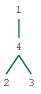

In [79]:
children_dict2tree(children)